<a href="https://colab.research.google.com/github/Asaikumarnayak/python/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg


In [ ]:
path=r"/content/drive/MyDrive/Colab Notebooks/data sets/archive"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator#for labeling
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [ ]:
img=image.load_img('')#covid image

In [ ]:
plt.imshow(img)#rgb image

In [ ]:
img1=image.load_img('')#pneumonia image

In [ ]:
img2=image.load_img('')#normal image

In [ ]:
#to see 3d matrix of image we use cv2
cv2.imread('').shape

In [ ]:
train=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/data sets/archive/COVID-19_Radiography_Dataset',target_size=(200,200),batch_size=100,class_mode="binary")

Found 2110 images belonging to 4 classes.


In [ ]:
train_dataset.class_indices

{'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}

In [ ]:
train_dataset.classes

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
len(train_dataset.classes)

2110

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    # next layer
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2),
                                    # next layer
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2),
                                      # 
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512,activation='relu'),
                                      
                                      tf.keras.layers.Dense(1,activation='softmax')
                                ])

In [ ]:
# model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),matrics=["accuracy"])

In [ ]:
from keras.metrics import PrecisionAtRecall,Recall

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[Recall()])

In [ ]:
model_fit=model.fit(train_dataset,epochs=50,steps_per_epoch=5)

Epoch 1/50
5/5 [==============================] - 103s 19s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 2/50
5/5 [==============================] - 66s 12s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 3/50
5/5 [==============================] - 49s 9s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 4/50
5/5 [==============================] - 43s 7s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 5/50
5/5 [==============================] - 29s 5s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 6/50
5/5 [==============================] - 27s 4s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 7/50
5/5 [==============================] - 22s 4s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 8/50
5/5 [==============================] - 23s 4s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 9/50
5/5 [==============================] - 19s 4s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 10/50
5/5 [==============================] - 17s 3s/step - loss: 0.0000e+00 - recall: 1.0000
Epoch 11/50
5/5 

In [ ]:
# accuracy of my model is 100%

In [ ]:
img=image.load_img('/content/COVID-1.png')

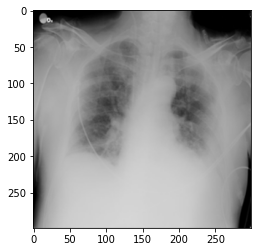

In [ ]:
plt.imshow(img)

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x,axis=0)#since the image has no lable 

In [ ]:
model.predict(x)

In [ ]:
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(1, 1, 299, 299, 3)


In [ ]:
# Importing Image class from PIL module
# from PIL import Image
cv2.imread('/content/COVID-1.png').shape

(299, 299, 3)

In [ ]:
# we need a resize image to 200,200,3
image=cv2.imread('/content/COVID-1.png')
resized_image = cv2.resize(image, (200,200)) 

In [ ]:
image#this is 3d array of an image

In [ ]:
resized_image.shape

(200, 200, 3)

In [ ]:
x=np.expand_dims(resized_image,axis=0)
# images=np.vstack([x])#join multiple images

In [ ]:
model.predict(images)

array([[1.]], dtype=float32)

In [ ]:
a=model.predict(images)

In [ ]:
if a[[0]]==1:
  print("covid")

covid


In [ ]:
# img=image.load_img('/content/Normal-1.png')
nimg=cv2.imread('/content/Normal-1.png').shape

In [ ]:
nimg

(299, 299, 3)

In [ ]:
ri = cv2.resize(nimg, (200,200)) 

In [ ]:
ri

array([[299., 299., 299., ..., 299., 299., 299.],
       [299., 299., 299., ..., 299., 299., 299.],
       [299., 299., 299., ..., 299., 299., 299.],
       ...,
       [  3.,   3.,   3., ...,   3.,   3.,   3.],
       [  3.,   3.,   3., ...,   3.,   3.,   3.],
       [  3.,   3.,   3., ...,   3.,   3.,   3.]])

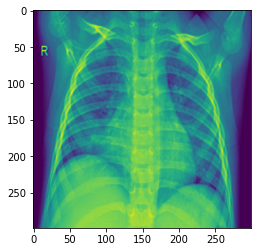

In [ ]:
img=mpimg.imread("/content/drive/MyDrive/Colab Notebooks/data sets/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1003.png")
implot=plt.imshow(img)
plt.show()#pneumonia

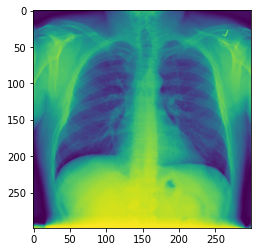

In [ ]:
img=mpimg.imread("/content/drive/MyDrive/Colab Notebooks/data sets/COVID-19_Radiography_Dataset/Normal/Normal-10.png")
implot=plt.imshow(img)
plt.show()#normal